- [CERT Insider threat](https://www.kaggle.com/datasets/nitishabharathi/cert-insider-threat?resource=download)
- [Source data - Insider Threat Test Dataset](https://kilthub.cmu.edu/articles/dataset/Insider_Threat_Test_Dataset/12841247/1)

In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
email = pd.read_csv('../data/email.csv')

In [61]:
psy = pd.read_csv('../data/psychometric.csv')

In [62]:
email.shape, psy.shape

((2629979, 11), (1000, 7))

In [63]:
psy.columns

Index(['employee_name', 'user_id', 'O', 'C', 'E', 'A', 'N'], dtype='object')

The OCEAN personality model, also known as the Big Five personality traits, consists of:
- Openness to Experience - Interest in new ideas, creativity, abstract thinking
- Conscientiousness - Organization, responsibility, planning, attention to detail
- Extraversion - Sociability, energy from others, assertiveness
- Agreeableness - Cooperation, compassion, consideration for others
- Neuroticism - Emotional sensitivity, tendency toward negative emotions, anxiety

In [65]:
psy.head(3)

,employee_name,user_id,O,C,E,A,N
0,Calvin Edan Love,CEL0561,40,39,36,19,40
1,Christine Reagan Deleon,CRD0624,26,22,17,39,32
2,Jade Felicia Caldwell,JFC0557,22,16,23,40,33


In [66]:
psy.skew(numeric_only=True)

O   -0.503853
C   -0.154100
E    0.026401
A    0.136057
N    0.027037
dtype: float64

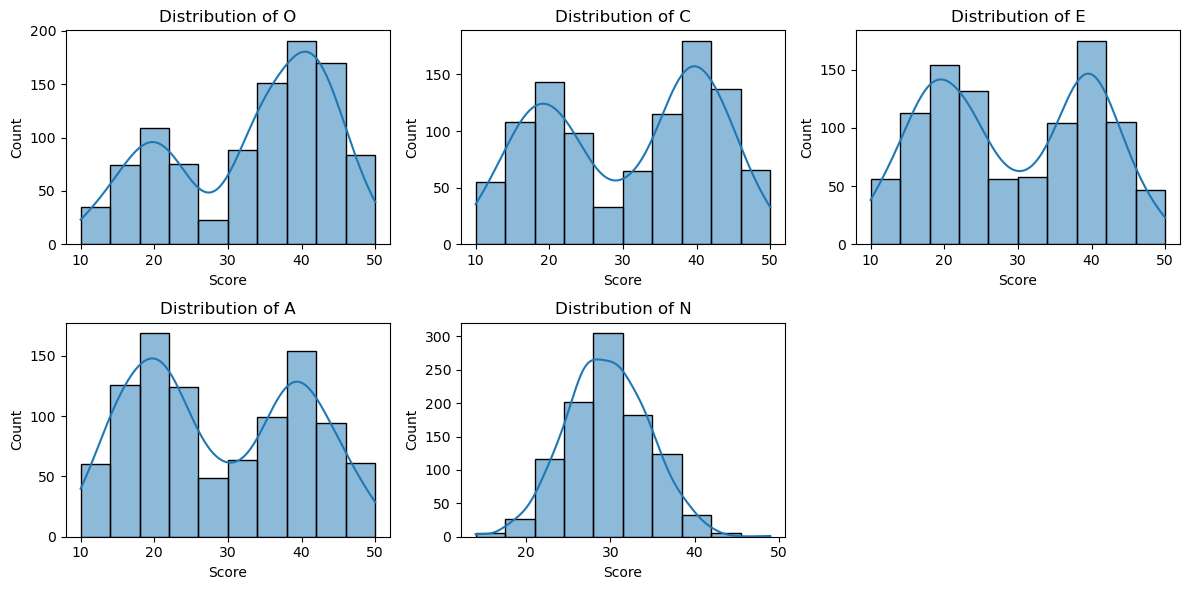

In [67]:
def plot_ocean_distributions(df):
    # Set up the figure with 5 subplots for O, C, E, A, N
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))
    # Delete the last subplot since only need 5 in this case
    fig.delaxes(axes[1, 2])
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Traits to plot
    traits = ['O', 'C', 'E', 'A', 'N']
    
    # Create distribution plots for each trait
    for i, trait in enumerate(traits):
        sns.histplot(data=df, x=trait, bins=10, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {trait}')
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Count')
        
    # Adjust layout to prevent overlap
    plt.tight_layout()
    return fig

plots = plot_ocean_distributions(psy)
plt.savefig('../img/Distribution.png',transparent=True)
plt.show()

Openness:
- Has two clear peaks around scores of 20 and 40
- This split suggests there's a natural division between more conventional thinkers (20) and more innovative ones (40)
- Very few people score in the middle range (around 30)

Conscientiousness:
- Also shows two distinct groups centered around 20 and 40
- Represents a split between more flexible/spontaneous workers (20) and more structured/organized ones (40)
- The valley between peaks at 30 suggests this trait tends to develop more distinctly in one direction

Extraversion:
- Classic bimodal distribution matching common understanding of introvert/extrovert tendencies
- Clear groupings around 20 (more introverted) and 40 (more extroverted)
- The deep valley at 30 suggests people tend to develop more strongly in one direction

Agreeableness:
- Similar bimodal pattern with peaks at 20 and 40
- Represents a split between more competitive/direct styles (20) and more cooperative/accommodating ones (40)
- Distribution suggests people tend to develop either a more assertive or more accommodating interpersonal style

Neuroticism:
- Notably different from others with a normal distribution
- Centered around 30-35
- Suggests emotional sensitivity follows more of a natural bell curve in the population
- This is the only trait showing this pattern, which is interesting from a psychological perspective

The bimodal patterns in O, C, E, and A suggest teams likely have natural "opposites" working together:
- Likely have both "planners" and "improvisers" (C split)
- Both innovative and traditional thinkers (O split)
- Both outgoing and reserved team members (E split)
- Both direct and diplomatic communicators (A split)

### Contextualizing OCEAN scores

OCEAN scores are _typically_ measured on a scale of 0-100 or as percentiles, with:

- 0-20: Very Low
- 21-40: Low
- 41-60: Moderate/Average
- 61-80: High
- 81-100: Very High

For example, Calvin Edan Love:
- Openness: 40 (Average/Low)
- Conscientiousness: 39 (Low)
- Extraversion: 36 (Low)
- Agreeableness: 19 (Very Low)
- Neuroticism: 40 (Average/Low)

Calvin appears to be someone who tends to be quite reserved and direct in their interactions (low Agreeableness at 19). This doesn't mean they're unfriendly, but they likely prefer straightforward communication and may prioritize honesty over diplomacy. They might be perceived as blunt or no-nonsense in their approach.

With moderate-low Openness (40) and Conscientiousness (39), Calvin likely:
- Balances between tried-and-true methods and new approaches
- May need some structure to stay organized, but isn't rigid
- Probably works best with clear expectations and moderate oversight

Their low Extraversion (36) suggests they:
- Likely prefer quieter, less stimulating work environments
- May do their best work independently or in small groups
- Might need time to recharge after heavy social interaction

The moderate-low Neuroticism (40) indicates:
- Generally stable emotional responses
- Reasonable stress tolerance
- Ability to maintain composure in most situations

For management purposes, Calvin might respond best to:
- Direct, clear communication
- Independent work assignments
- A balance of routine and variety
- Time to process changes before implementing them

In [74]:
psy.describe()

,O,C,E,A,N
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,33.173000,30.653000,29.19700,28.821000,29.608000
std,10.642007,11.291505,10.95647,11.170844,4.938494
min,10.000000,10.000000,10.00000,10.000000,14.000000
25%,23.000000,20.000000,19.00000,19.000000,26.000000
50%,36.000000,33.000000,28.00000,27.000000,29.000000
75%,42.000000,40.000000,39.00000,39.000000,33.000000
max,50.000000,50.000000,50.00000,50.000000,49.000000


If the maximum value in the data is 50, the ranges should be adjusted accordingly to reflect the same proportional scale.

- 0-10: Very Low
- 11-20: Low
- 21-30: Moderate/Average
- 31-40: High
- 41-50: Very High

Looking at Calvin's scores against a 50-point maximum:

- O: 40/50 (Very High)
- C: 39/50 (Very High)
- E: 36/50 (High)
- A: 19/50 (Medium-Low)
- N: 40/50 (Very High)

This paints a very different picture!

Calvin instead shows:
- High Openness: Likely very intellectually curious, creative, and open to new experiences
- High Conscientiousness: Very organized, responsible, and detail-oriented
- High Extraversion: Quite sociable and energized by external engagement
- Lower Agreeableness: More competitive and willing to challenge others
- High Neuroticism: More sensitive to stress and emotional stimuli

This suggests someone who is highly capable and engaged, but might struggle with perfectionism (high C + high N) and could come across as somewhat intense (high E + lower A). They're likely an innovator (high O) who pushes for excellence but might need support managing stress levels.

#### Theorizing in the context of insider cybersecurity threats

Conscientiousness split (20 vs 40):
- Lower C individuals might pose higher accidental risk through poor security hygiene or disregard for protocols
- Higher C individuals, while generally protective, might be rigid enough in their patterns to be predictable

Openness split (20 vs 40):
- Higher O individuals might be more likely to experiment with unauthorized tools/systems
- Lower O individuals might be more resistant to adopting new security measures

Agreeableness split (20 vs 40):
- Lower A individuals might be more likely to act independently against policies if they disagree
- Higher A individuals could be more susceptible to social engineering and manipulation

Extraversion split (20 vs 40):
- Higher E individuals might share information too freely
- Lower E individuals might be harder to detect if acting maliciously due to less social interaction

Neuroticism's normal distribution might be actually protective here - most people cluster around moderate emotional stability. However, outliers at the high end might be more susceptible to stress-induced security lapses or emotional manipulation.

In [79]:
focus_group = psy[
    (psy['C'] < 20) |  # Low Conscientiousness
    (psy['N'] > 40)    # High Neuroticism
]
# Select the user_id and employee_name columns for the focus group
focus_group_result = focus_group[['user_id', 'employee_name']]

# Display the result
print(focus_group_result)

focus_group_result.to_csv('../data/focus_group_users.csv', index=False)

     user_id            employee_name
2    JFC0557    Jade Felicia Caldwell
6    AAL0706         April Alika Levy
13   GCG0951         Grant Camden Gay
16   CJV0286  Colorado John Valentine
19   QOS0878     Quynn Odessa Sanford
..       ...                      ...
982  MAW0166    Meredith Ainsley Wolf
983  PPF0435    Preston Plato Fischer
993  ATE0869    Aquila Tanner Ellison
995  DTT0076        Dylan Tiger Terry
998  JSH0330  Judith Shaeleigh Hayden

[244 rows x 2 columns]
